In [95]:
import cv2
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [96]:
file_name = os.path.join('annot','demo'+'.json')
with open(file_name) as anno_file:
    anno = json.load(anno_file)

In [97]:
def get_3rd_point(a, b):
    direct = a - b
    return b + np.array([-direct[1], direct[0]], dtype=np.float32)

def get_dir(src_point, rot_rad):
    sn, cs = np.sin(rot_rad), np.cos(rot_rad)

    src_result = [0, 0]
    src_result[0] = src_point[0] * cs - src_point[1] * sn
    src_result[1] = src_point[0] * sn + src_point[1] * cs

    return src_result

In [98]:
def get_affine_transform(center,
                         scale,
                         rot,
                         output_size,
                         shift=np.array([0, 0], dtype=np.float32),
                         inv=0):
    
    scale_tmp = scale * 200.0
    src_w = scale_tmp[0]
    dst_w = output_size[0]
    dst_h = output_size[1]

    rot_rad = np.pi * rot / 180
    src_dir = get_dir([0, src_w * -0.5], rot_rad)
    dst_dir = np.array([0, dst_w * -0.5], np.float32)

    src = np.zeros((3, 2), dtype=np.float32)
    dst = np.zeros((3, 2), dtype=np.float32)
    src[0, :] = center + scale_tmp * shift
    src[1, :] = center + src_dir + scale_tmp * shift
    dst[0, :] = [dst_w * 0.5, dst_h * 0.5]
    dst[1, :] = np.array([dst_w * 0.5, dst_h * 0.5]) + dst_dir

    src[2:, :] = get_3rd_point(src[0, :], src[1, :])
    dst[2:, :] = get_3rd_point(dst[0, :], dst[1, :])

    if inv:
        trans = cv2.getAffineTransform(np.float32(dst), np.float32(src))
    else:
        trans = cv2.getAffineTransform(np.float32(src), np.float32(dst))

    return trans

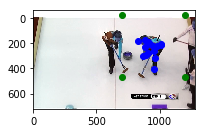

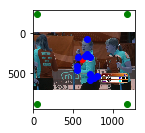

In [107]:

for a in anno:
    
    image_name = a['image']
    c = np.array(a['center'], dtype=np.float)
    s = np.array([a['scale'], a['scale']], dtype=np.float)
    joints = np.array(a['joints'], dtype=np.float)
    img = cv2.imread(os.path.join('demo',image_name))  
    
    plt.subplot(2,1,i)
    plt.imshow(img)
    #plt.imshow(input)
    #point()
    plt.plot(c[0],c[1],'ro')
    alpha=200
    left_up_x=c[0]-0.5*s[0]*alpha
    left_up_y=c[1]-0.5*s[0]*alpha
    plt.plot(left_up_x,left_up_y,'go')
    
    
    right_up_x=c[0]+0.5*s[0]*alpha
    right_up_y=c[1]-0.5*s[0]*alpha
    plt.plot(right_up_x,right_up_y,'go')
    
    left_down_x=c[0]-0.5*s[0]*alpha
    left_down_y=c[1]+0.5*s[0]*alpha
    plt.plot(left_down_x,left_down_y,'go')
    
    right_down_x=c[0]+0.5*s[0]*alpha
    right_down_y=c[1]+0.5*s[0]*alpha
    plt.plot(right_down_x,right_down_y,'go')
    for elements in joints :
        if elements[0]>0:
            plt.plot(elements[0],elements[1],'bo')
    plt.show()
    
    #plt.plt()


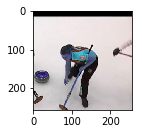

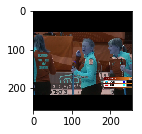

In [106]:
for a in anno: 
    
    image_name = a['image']
    c = np.array(a['center'], dtype=np.float)
    s = np.array([a['scale'], a['scale']], dtype=np.float)
    joints = np.array(a['joints'], dtype=np.float)
    img = cv2.imread(os.path.join('demo',image_name))
    trans = get_affine_transform(c, s, 0, [256,256])
    
    input_img = cv2.warpAffine(
            img,
            trans,
            (256, 256),
            flags=cv2.INTER_LINEAR)
    plt.subplot(2,1,i)
    
    plt.imshow(input_img)
    plt.show()